In [1]:
import pandas as pd
import os
from Helpers.image_helper import obtain_file_paths, create_image_grid_from_paths

In [6]:
import matplotlib.pyplot as plt
plt.style.use('default')
def create_display_grid(dframe, subject_number, dataset_root, title, dataset_name, num_cols=6, sort_keys = None, scale=3):
    file_paths = []
    titles = []
    info_dic = {}
    for row in dframe.to_dict(orient='record'):
        frame_index = int(row['frames_present']/2)
        full_path = os.path.join(dataset_root, row['directory_path'])
        paths = obtain_file_paths(full_path, r"^frame")
        file_paths.append(paths[frame_index])
        save_name = f"{dataset_name}_{subject_number}"
        av = row['attack_category']
        if "HR" in av:
            av = f"{av[-1]}_HR"
        title_string = f"ST: {av}"
        if "medium_name" in row:
            title_string += f" | M: {row['medium_name']}"
        # if "sensor_id" in row:
        #     title_string += f" | C: {row['sensor_id']}"
        if "session_id" in row:
            title_string += f" | S: {row['session_id']}"
        info_dic[title_string] = paths[frame_index]
        titles.append(title_string)#| M: {row['medium_name']}")# | S: {row['sensor_name']}")
    if sort_keys is not None:
        temp_dic = {}
        for key in sort_keys:
            tempkey = f"ST: {key}"
            temp_dic[tempkey] = info_dic[tempkey]
        info_dic = temp_dic
    file_paths = list(info_dic.values())
    titles = list(info_dic.keys())
    titles = [t.split(" | S")[0] for t in titles]
    # titles = [t.split(" | C")[0] for t in titles]
    create_image_grid_from_paths(file_paths,class_names=titles, file_name=f"S{subject_number}_{save_name}.pdf", title=title, must_show=True,num_cols=num_cols, fontsize=10, scale=scale)
    return file_paths, titles




# Visualise SiW

In [3]:
dataset_root = "/home/jarred/Documents/Datasets/SIW"
dataset_csv = "siw.csv"
train_subject_number = 90
test_subject_number = 75
combinations = ['ASUS-IP7P-IPP2017' ,'ASUS-IP7P-SGS8', 'ASUS-IPP2017-SGS8', 'IP7P-IPP2017-SGS8', 'P', 'R']


## Train Set

In [5]:
df = pd.read_csv(os.path.join(dataset_root, dataset_csv)).query(f"subject_number == {train_subject_number}").sort_values('attack_category')

/tmp/ipykernel_4987/3664106360.py:7: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  for row in dframe.to_dict(orient='record'):
/home/jarred/anaconda3/envs/Orfao_Masters/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2022-11-02 18:38:56.270079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 18:38:56.288189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such f

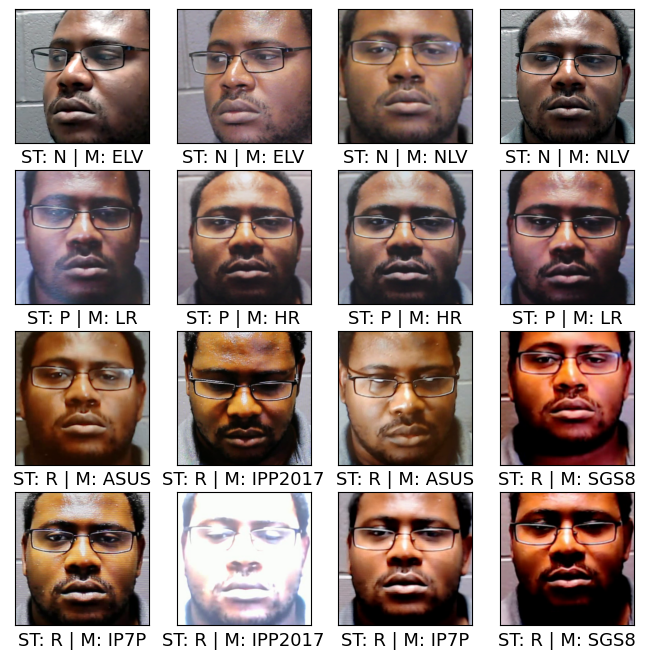

(['/home/jarred/Documents/Datasets/SIW/test/real/90/090-2-1-2-1/frame_274.png',
  '/home/jarred/Documents/Datasets/SIW/test/real/90/090-1-1-2-2/frame_224.png',
  '/home/jarred/Documents/Datasets/SIW/test/real/90/090-1-1-1-2/frame_274.png',
  '/home/jarred/Documents/Datasets/SIW/test/real/90/090-2-1-1-1/frame_63.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/90/090-1-2-2-2/frame_224.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/90/090-1-2-1-2/frame_224.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/90/090-1-2-1-1/frame_434.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/90/090-1-2-2-1/frame_46.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/90/090-2-3-3-2/frame_292.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/90/090-1-3-1-1/frame_349.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/90/090-2-3-3-1/frame_406.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/90/090-2-3-4-2/frame_349.png',
  '/home/jarred/Documents/Datasets

In [7]:
create_display_grid(df, test_subject_number, dataset_root, None, "SIW", num_cols=4, scale=2)

## Test Set

In [8]:
df = pd.read_csv(os.path.join(dataset_root, dataset_csv)).query(f"subject_number == {test_subject_number}").sort_values('attack_category')

/tmp/ipykernel_4987/3664106360.py:7: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  for row in dframe.to_dict(orient='record'):


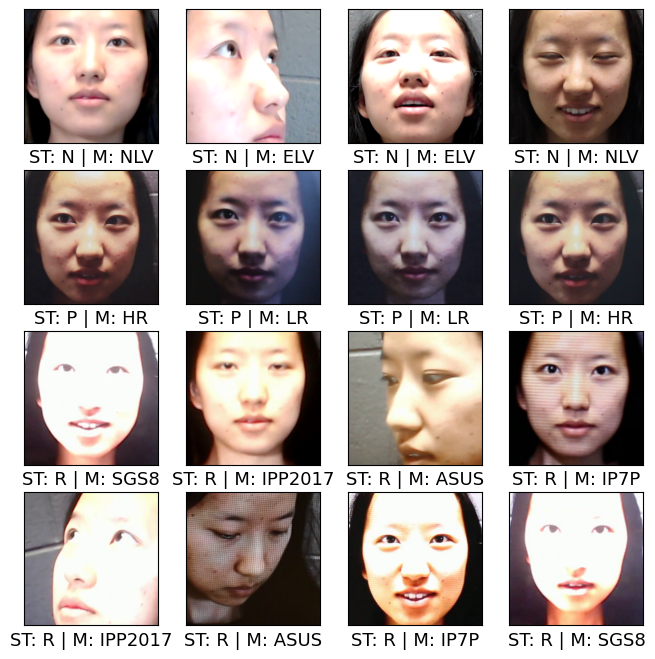

(['/home/jarred/Documents/Datasets/SIW/test/real/75/075-2-1-1-2/frame_476.png',
  '/home/jarred/Documents/Datasets/SIW/test/real/75/075-2-1-2-2/frame_986.png',
  '/home/jarred/Documents/Datasets/SIW/test/real/75/075-2-1-2-1/frame_930.png',
  '/home/jarred/Documents/Datasets/SIW/test/real/75/075-1-1-1-1/frame_89.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/75/075-1-2-1-2/frame_224.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/75/075-1-2-2-1/frame_349.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/75/075-1-2-2-2/frame_89.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/75/075-1-2-1-1/frame_89.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/75/075-2-3-4-2/frame_3.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/75/075-2-3-1-2/frame_262.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/75/075-2-3-3-2/frame_63.png',
  '/home/jarred/Documents/Datasets/SIW/test/spoof/75/075-1-3-2-1/frame_349.png',
  '/home/jarred/Documents/Datasets/SIW

In [9]:
create_display_grid(df, test_subject_number, dataset_root, None, "SIW", num_cols=4, scale=2)

# Visualise CASIA

In [10]:
dataset_root = "/home/jarred/Documents/Datasets/CASIA"
dataset_csv = "casia.csv"
train_subject_number = 1
test_subject_number = 1
sorted_keys = [
    "N1", "C1", "W1", "R1",
    "N2", "C2", "W2", "R2",
    "N_HR", "C_HR", "W_HR", "R_HR",
]

## Train Set

In [13]:
df = pd.read_csv(os.path.join(dataset_root, dataset_csv)).query(f"subject_number == {train_subject_number} and usage_type == 'train'").sort_values('attack_category')

/tmp/ipykernel_4987/3664106360.py:7: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  for row in dframe.to_dict(orient='record'):


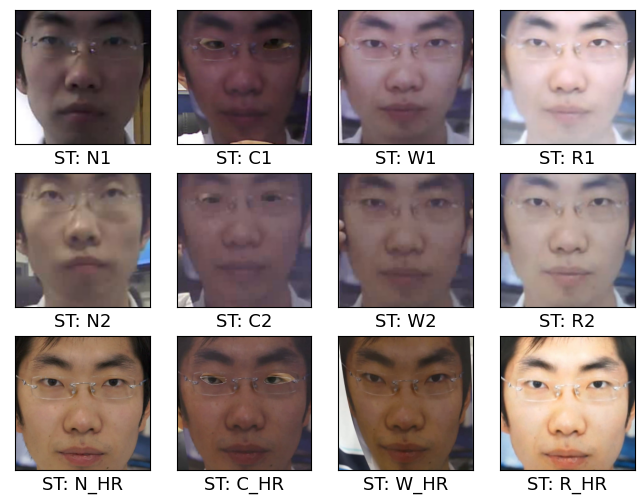

(['/home/jarred/Documents/Datasets/CASIA/train/real/1/1/frame_63.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/5/frame_63.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/3/frame_84.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/7/frame_63.png',
  '/home/jarred/Documents/Datasets/CASIA/train/real/1/2/frame_50.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/6/frame_84.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/4/frame_46.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/8/frame_46.png',
  '/home/jarred/Documents/Datasets/CASIA/train/real/1/HR_1/frame_12.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/HR_3/frame_63.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/HR_2/frame_84.png',
  '/home/jarred/Documents/Datasets/CASIA/train/spoof/1/HR_4/frame_84.png'],
 ['ST: N1',
  'ST: C1',
  'ST: W1',
  'ST: R1',
  'ST: N2',
  'ST: C2',
  'ST: W2',
  'ST: R2',
  'ST: N_HR',
  'ST: C_HR',
  

In [14]:
create_display_grid(df, train_subject_number, dataset_root, None, "CASIA", num_cols=4, scale=2, sort_keys=sorted_keys)

## Test Set

In [15]:
df = pd.read_csv(os.path.join(dataset_root, dataset_csv)).query(f"subject_number == {test_subject_number} and usage_type == 'test'").sort_values('attack_category')

/tmp/ipykernel_4987/3664106360.py:7: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  for row in dframe.to_dict(orient='record'):


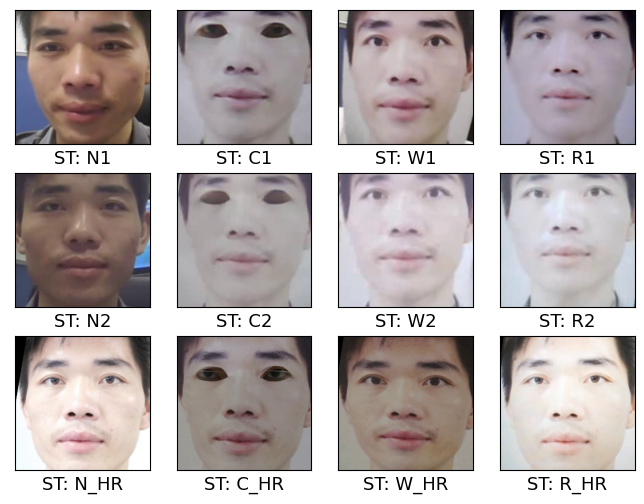

(['/home/jarred/Documents/Datasets/CASIA/test/real/1/1/frame_89.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/5/frame_46.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/3/frame_63.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/7/frame_84.png',
  '/home/jarred/Documents/Datasets/CASIA/test/real/1/2/frame_50.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/6/frame_84.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/4/frame_63.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/8/frame_12.png',
  '/home/jarred/Documents/Datasets/CASIA/test/real/1/HR_1/frame_12.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/HR_3/frame_84.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/HR_2/frame_84.png',
  '/home/jarred/Documents/Datasets/CASIA/test/spoof/1/HR_4/frame_84.png'],
 ['ST: N1',
  'ST: C1',
  'ST: W1',
  'ST: R1',
  'ST: N2',
  'ST: C2',
  'ST: W2',
  'ST: R2',
  'ST: N_HR',
  'ST: C_HR',
  'ST: W_HR',


In [16]:
create_display_grid(df, test_subject_number, dataset_root, None, "CASIA", num_cols=4, scale=2, sort_keys=sorted_keys)
# paths, titles = create_display_grid(df, test_subject_number, dataset_root, None, "SIW", num_cols=4, scale=2)